## Performance Evaluation of multiclass

In [ ]:
# for data processing
import pandas as pd
import numpy as np

# package for calculation
import math

import os
import pickle

# packages for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

# interpret training result
import seaborn as sns
from sklearn import metrics
# from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

# set the random seed to ensure the result is reproducible
import random
random.seed(10)
np.random.seed(10)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
selected_features = pd.read_csv(r'/content/drive/MyDrive/Evaluation of performance of machine learning models on DDoS Detection/Multiclass/Dataset/Feature selected/CICDDoS2019_Multiclass_RFClassifier_30.csv').squeeze()
selected_features = selected_features[:20]


In [ ]:
CICDDoS2019 = pd.read_csv(r'/content/drive/MyDrive/Evaluation of performance of machine learning models on DDoS Detection/Multiclass/Dataset/Encoded Dataset/CIC-DDoS2019_multi.csv')

# Create the 'columns' list using 'selected_features' and columns starting with 'Label_'
columns = selected_features.tolist() + [col for col in CICDDoS2019.columns if col.startswith('Label_')]

# Use the 'columns' list to select specific columns from 'CICDDoS2019'
CICDDoS2019 = CICDDoS2019[columns]


In [ ]:
CICDDoS2019.shape

(300000, 32)

In [ ]:
target_columns = [col for col in CICDDoS2019.columns if col.startswith('Label_')]

# Sample 10% of the data and reset the index
CICDDoS2019_sampled = CICDDoS2019.sample(frac=0.4, random_state=42).reset_index(drop=True)

# Print class distribution for each target column
for column in target_columns:
    print(f'Class distribution for {column}:')
    print(CICDDoS2019_sampled[column].value_counts())
    print()

Class distribution for Label_BENIGN:
0.0    110041
1.0      9959
Name: Label_BENIGN, dtype: int64

Class distribution for Label_DrDoS_DNS:
0.0    110015
1.0      9985
Name: Label_DrDoS_DNS, dtype: int64

Class distribution for Label_DrDoS_LDAP:
0.0    110001
1.0      9999
Name: Label_DrDoS_LDAP, dtype: int64

Class distribution for Label_DrDoS_MSSQL:
0.0    110038
1.0      9962
Name: Label_DrDoS_MSSQL, dtype: int64

Class distribution for Label_DrDoS_NTP:
0.0    109969
1.0     10031
Name: Label_DrDoS_NTP, dtype: int64

Class distribution for Label_DrDoS_NetBIOS:
0.0    110018
1.0      9982
Name: Label_DrDoS_NetBIOS, dtype: int64

Class distribution for Label_DrDoS_SNMP:
0.0    109894
1.0     10106
Name: Label_DrDoS_SNMP, dtype: int64

Class distribution for Label_DrDoS_SSDP:
0.0    109993
1.0     10007
Name: Label_DrDoS_SSDP, dtype: int64

Class distribution for Label_DrDoS_UDP:
0.0    110009
1.0      9991
Name: Label_DrDoS_UDP, dtype: int64

Class distribution for Label_Syn:
0.0    10

In [ ]:
# Separate features and labels
DDoS2019_X = CICDDoS2019_sampled.drop(CICDDoS2019_sampled.filter(regex='^Label_'), axis=1).copy()
DDoS2019_y = CICDDoS2019_sampled[CICDDoS2019_sampled.filter(regex='^Label_').columns].copy()

# Split the dataset into training and testing sets
DDoS2019_train_X, DDoS2019_test_X, DDoS2019_train_y, DDoS2019_test_y = train_test_split(DDoS2019_X, DDoS2019_y, test_size=0.2)

In [ ]:

scalar = StandardScaler()

# only fit the training data
DDoS2019_train_X_scaled = scalar.fit(DDoS2019_train_X)

DDoS2019_train_X_scaled = scalar.transform(DDoS2019_train_X)
DDoS2019_test_X_scaled = scalar.transform(DDoS2019_test_X)

In [ ]:
models = {
    'k-Nearest Neighbour': KNeighborsClassifier(n_neighbors=5, algorithm='auto', weights='distance', metric='euclidean', p=1, leaf_size=30),
    'Random Forest': RandomForestClassifier(max_depth=30, min_samples_leaf=1e-05, min_samples_split=1e-05, n_estimators=200, n_jobs=-1,criterion='gini'),
    'Artificial Neural Network': MLPClassifier(hidden_layer_sizes=(50,), activation='relu', alpha=0.001, solver='adam', max_iter=500),
    'Deep Neural Network': MLPClassifier(hidden_layer_sizes= (10, 10, 10, 10), activation='relu', alpha=0.0001, solver='adam', max_iter=1000),
    'XGBoost': xgb.XGBClassifier(colsample_bytree=0.9, learning_rate=0.4, max_depth=6, min_child_weight=1, n_estimators=400, subsample=0.9)

}


-------------------- k-Nearest Neighbour --------------------
               precision    recall  f1-score   support

       BENIGN     0.9939    0.9964    0.9952      1959
    DrDoS_DNS     0.7625    0.2677    0.3962      2051
   DrDoS_LDAP     0.4081    0.8751    0.5566      2009
  DrDoS_MSSQL     0.9285    0.9419    0.9352      2014
    DrDoS_NTP     0.9902    0.9959    0.9930      1928
DrDoS_NetBIOS     0.9490    0.9802    0.9643      1973
   DrDoS_SNMP     0.8542    0.3138    0.4590      1998
   DrDoS_SSDP     0.6494    0.7186    0.6822      2072
    DrDoS_UDP     0.6873    0.5759    0.6267      1962
          Syn     0.6139    0.9766    0.7539      2055
         TFTP     0.9926    0.9775    0.9850      1912
      UDP-lag     0.8771    0.2796    0.4241      2067

    micro avg     0.7538    0.7379    0.7458     24000
    macro avg     0.8089    0.7416    0.7310     24000
 weighted avg     0.8065    0.7379    0.7271     24000
  samples avg     0.7379    0.7379    0.7379     24000



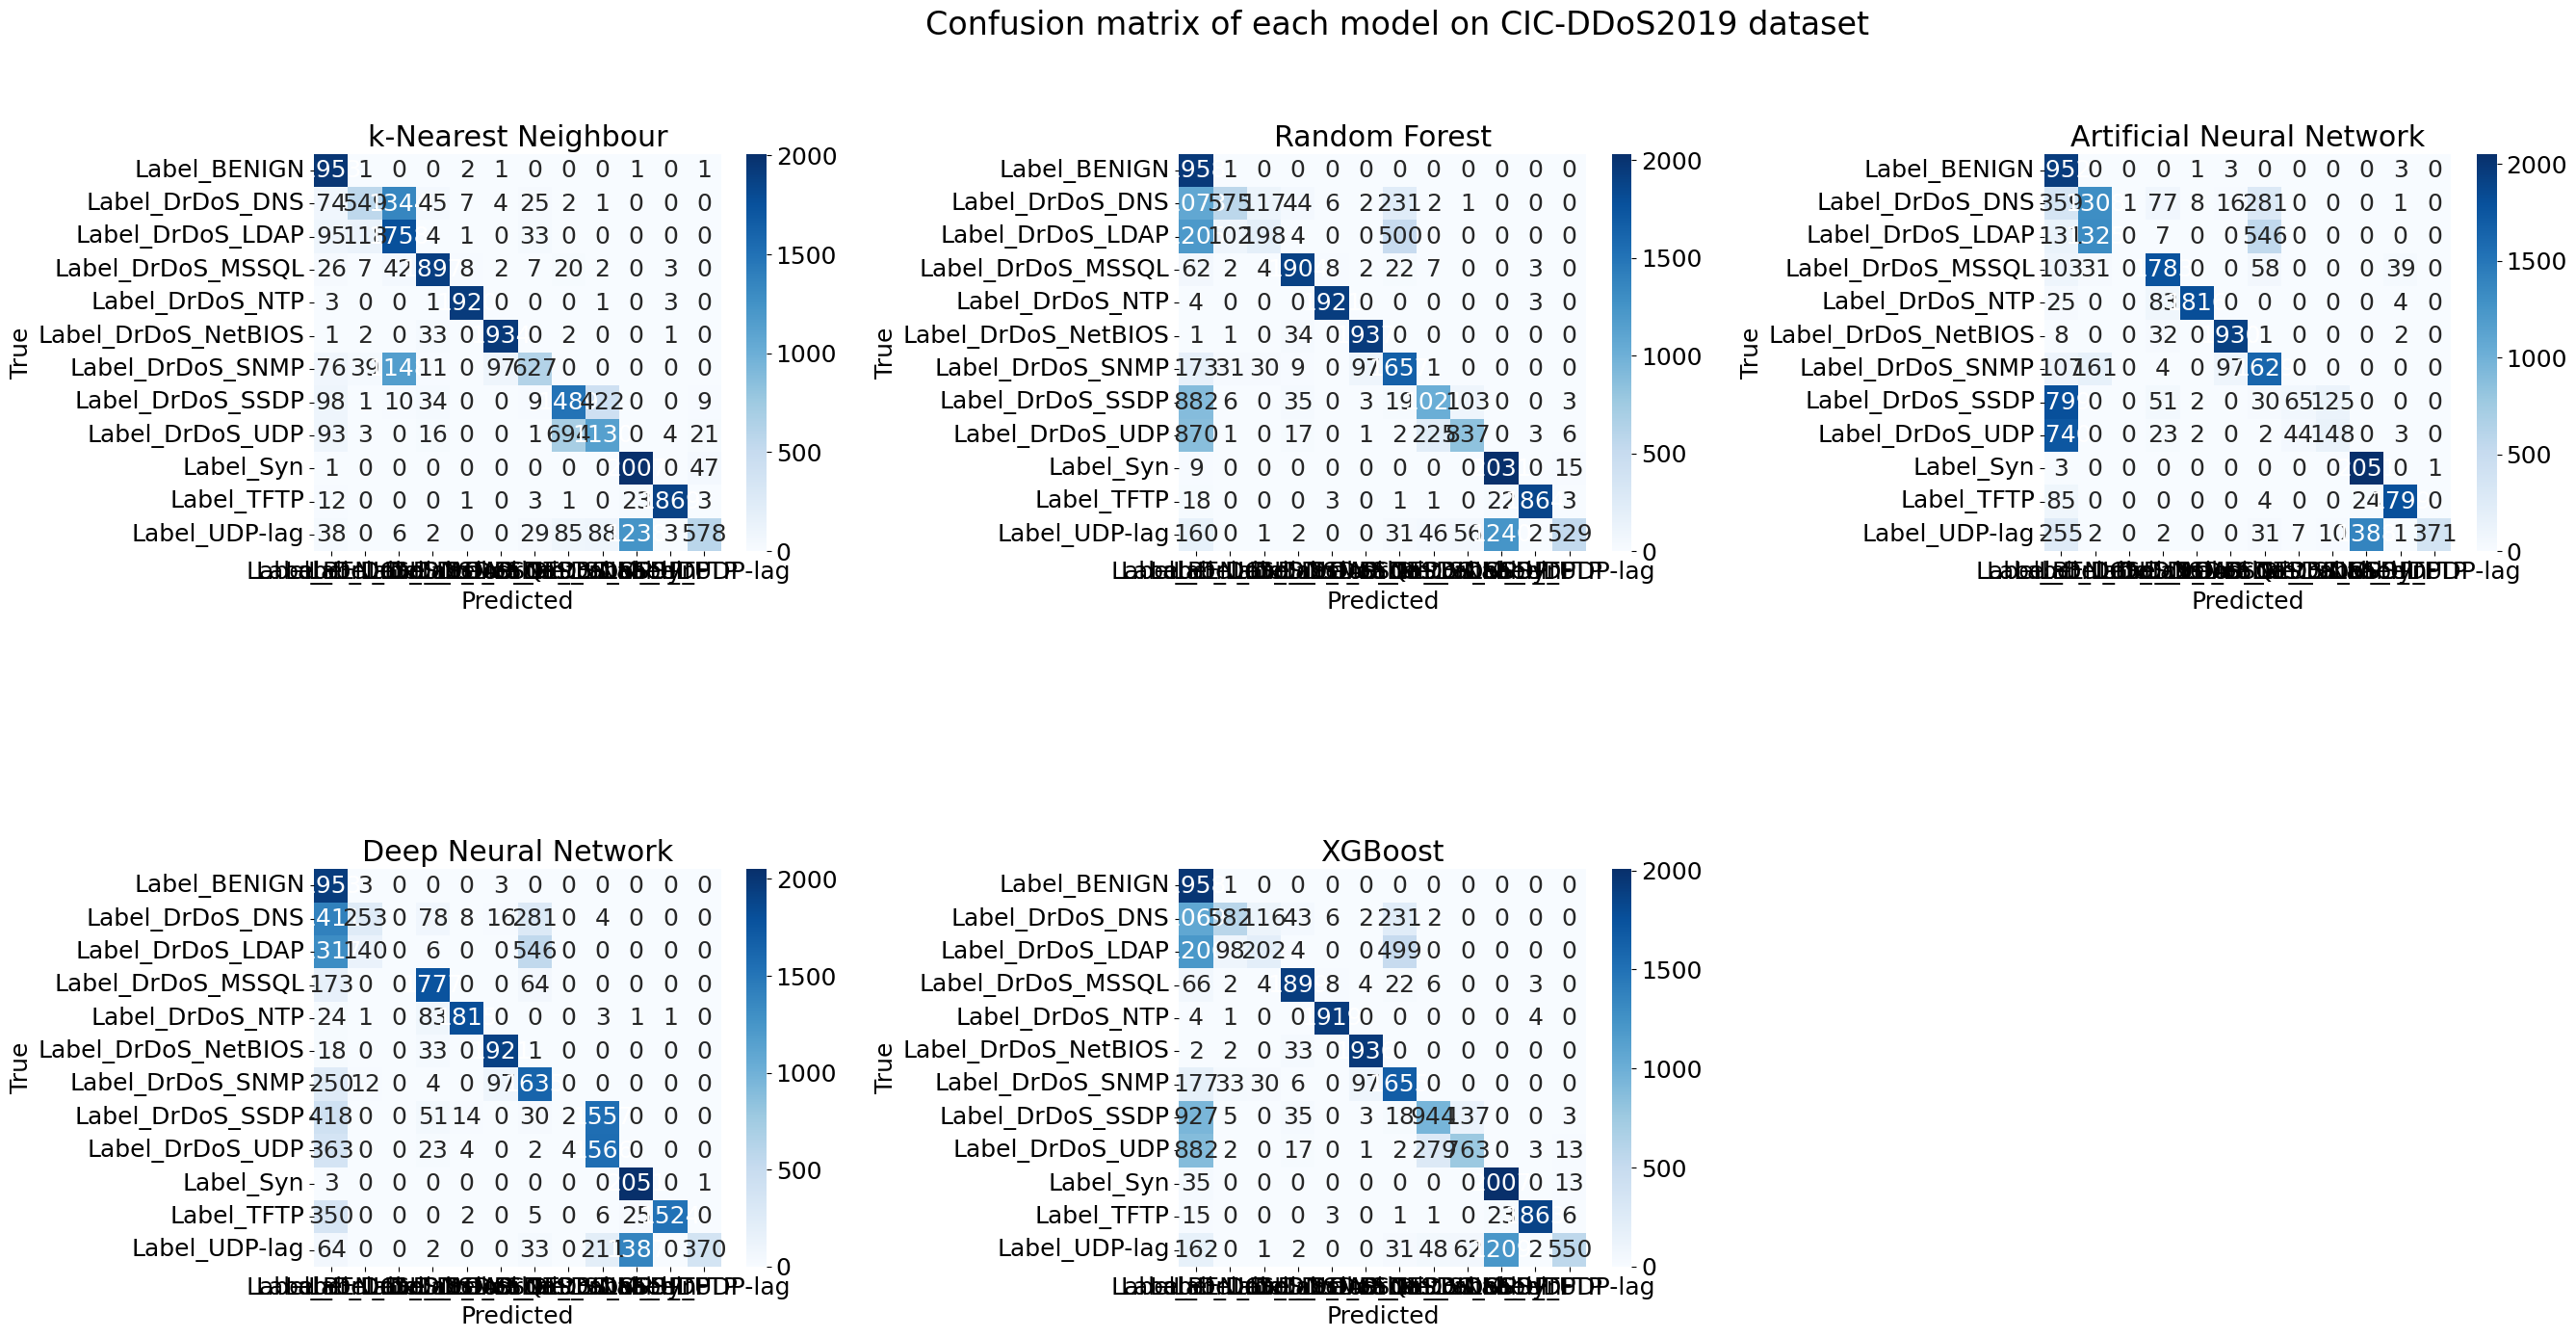

In [ ]:


plt.rcParams.update({'font.size': 18})

# Calculate the number of models and layout dimensions
num_models = len(models)
num_rows = 2
num_cols = int(np.ceil(num_models / num_rows))

# Create the subplots grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 15))
flatten_axes = axes.flatten()  # Flatten the axes array for easier indexing

# Dictionaries to store the reports, accuracy, and F1 score
classification_reports = {}
accuracy_scores = {}
f1_scores = {}

# Iterate over the models
for i, (model_name, model) in enumerate(models.items()):
    # Fit the model on the training data
    model.fit(DDoS2019_train_X_scaled, DDoS2019_train_y)

    # Generate predictions for the test set
    y_pred = model.predict(DDoS2019_test_X_scaled)

    # Extract the target labels with "Label_" prefix
    target_columns = [col for col in DDoS2019_test_y.columns if col.startswith("Label_")]
    target_names = [col.split("Label_")[1] for col in target_columns]

    # Compute the classification report
    report = classification_report(DDoS2019_test_y[target_columns], y_pred, digits=4, target_names=target_names, output_dict=True)

    # Save the classification report
    classification_reports[model_name] = report

    # Print the classification report
    print(f"{'-' * 20} {model_name} {'-' * 20}")
    print(classification_report(DDoS2019_test_y[target_columns], y_pred, digits=4, target_names=target_names))

    # Compute the accuracy
    accuracy = accuracy_score(DDoS2019_test_y[target_columns], y_pred)
    accuracy_scores[model_name] = accuracy
    print(f"Accuracy: {accuracy}")
    print()

    # Compute the F1 score
    f1 = f1_score(DDoS2019_test_y[target_columns], y_pred, average='weighted')
    f1_scores[model_name] = f1

    # Compute the confusion matrix
    cm = confusion_matrix(DDoS2019_test_y[target_columns].values.argmax(axis=1), y_pred.argmax(axis=1))

    # Calculate the row and column index in the subplots grid
    row = i // num_cols
    col = i % num_cols

    # Create a figure and axis
    ax = flatten_axes[i]

    # Create the heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

    # Set labels, title, and ticks
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'{model_name}')
    ax.xaxis.set_ticklabels(target_columns, rotation=0)
    ax.yaxis.set_ticklabels(target_columns, rotation=0)

# Remove empty subplots
for i in range(num_models, num_rows * num_cols):
    fig.delaxes(flatten_axes[i])

# Adjust the layout spacing
fig.subplots_adjust(hspace=0.8, wspace=0.7)
fig.suptitle('Confusion matrix of each model on CIC-DDoS2019 dataset', fontsize=24)

# Save accuracy and F1 score as pickle file
with open('metrics.pkl', 'wb') as f:
    pickle.dump({'accuracy': accuracy_scores, 'f1_score': f1_scores}, f)

# Show the plot
plt.show()


-------------------- k-Nearest Neighbour --------------------
               precision    recall  f1-score   support

       BENIGN     0.9939    0.9964    0.9952      1959
    DrDoS_DNS     0.7625    0.2677    0.3962      2051
   DrDoS_LDAP     0.4081    0.8751    0.5566      2009
  DrDoS_MSSQL     0.9285    0.9419    0.9352      2014
    DrDoS_NTP     0.9902    0.9959    0.9930      1928
DrDoS_NetBIOS     0.9490    0.9802    0.9643      1973
   DrDoS_SNMP     0.8542    0.3138    0.4590      1998
   DrDoS_SSDP     0.6494    0.7186    0.6822      2072
    DrDoS_UDP     0.6873    0.5759    0.6267      1962
          Syn     0.6139    0.9766    0.7539      2055
         TFTP     0.9926    0.9775    0.9850      1912
      UDP-lag     0.8771    0.2796    0.4241      2067

    micro avg     0.7538    0.7379    0.7458     24000
    macro avg     0.8089    0.7416    0.7310     24000
 weighted avg     0.8065    0.7379    0.7271     24000
  samples avg     0.7379    0.7379    0.7379     24000



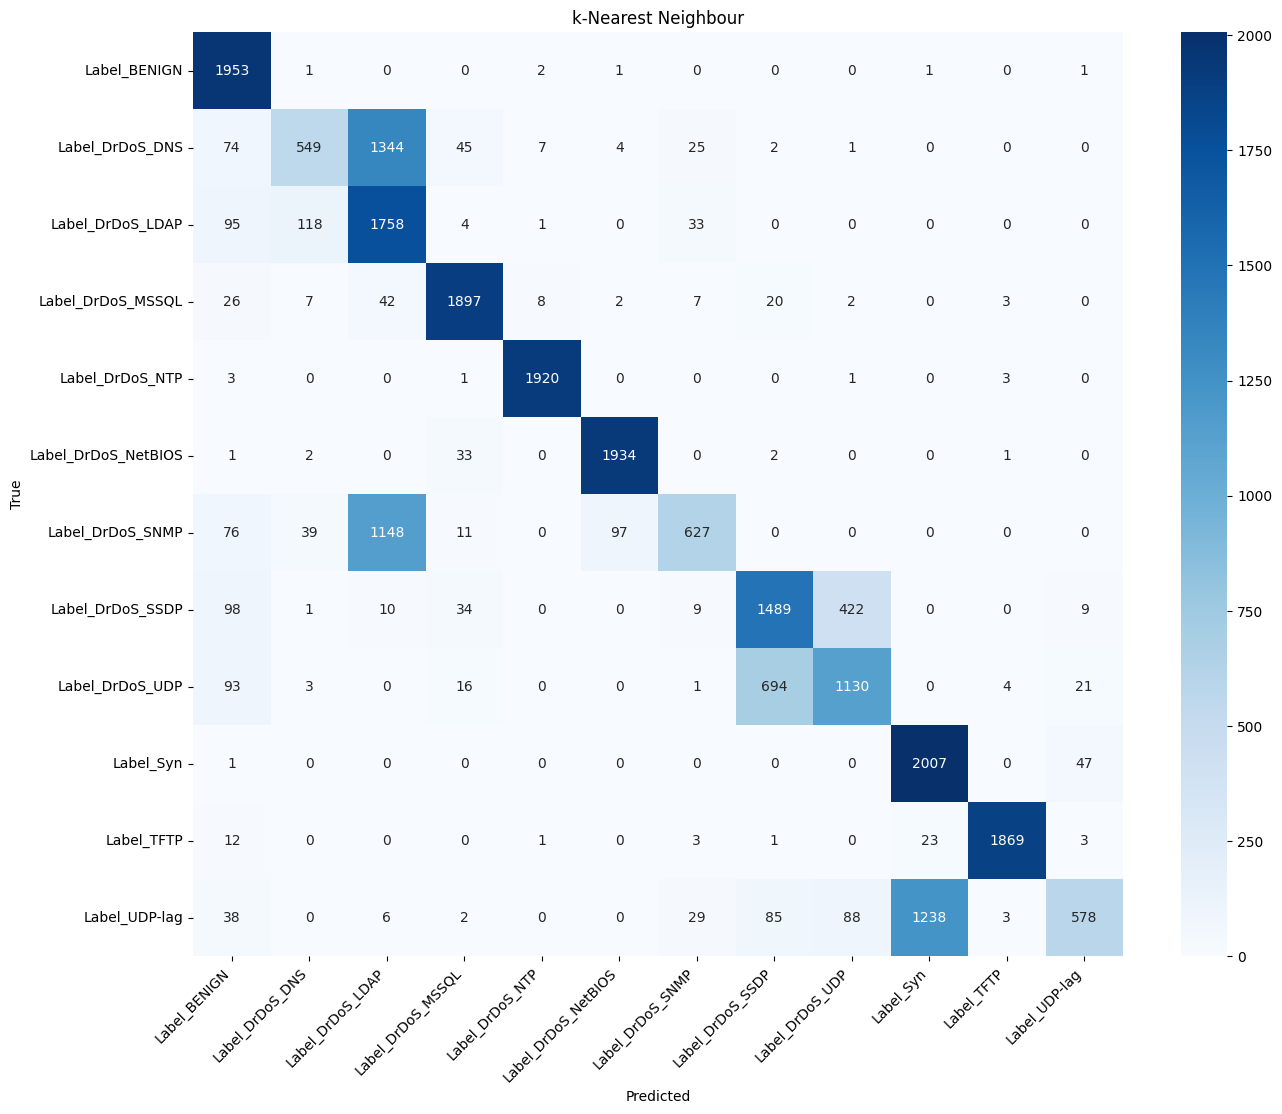

-------------------- Random Forest --------------------
               precision    recall  f1-score   support

       BENIGN     0.9944    0.9990    0.9967      1959
    DrDoS_DNS     0.7997    0.2804    0.4152      2051
   DrDoS_LDAP     0.5657    0.0986    0.1679      2009
  DrDoS_MSSQL     0.9292    0.9454    0.9372      2014
    DrDoS_NTP     0.9912    0.9964    0.9938      1928
DrDoS_NetBIOS     0.9486    0.9818    0.9649      1973
   DrDoS_SNMP     0.6728    0.8293    0.7429      1998
   DrDoS_SSDP     0.7836    0.4928    0.6050      2072
    DrDoS_UDP     0.8395    0.4266    0.5657      1962
          Syn     0.6168    0.9883    0.7595      2055
         TFTP     0.9941    0.9749    0.9844      1912
      UDP-lag     0.9514    0.2559    0.4034      2067

    micro avg     0.8403    0.6846    0.7545     24000
    macro avg     0.8406    0.6891    0.7114     24000
 weighted avg     0.8387    0.6846    0.7072     24000
  samples avg     0.6846    0.6846    0.6846     24000

Accura

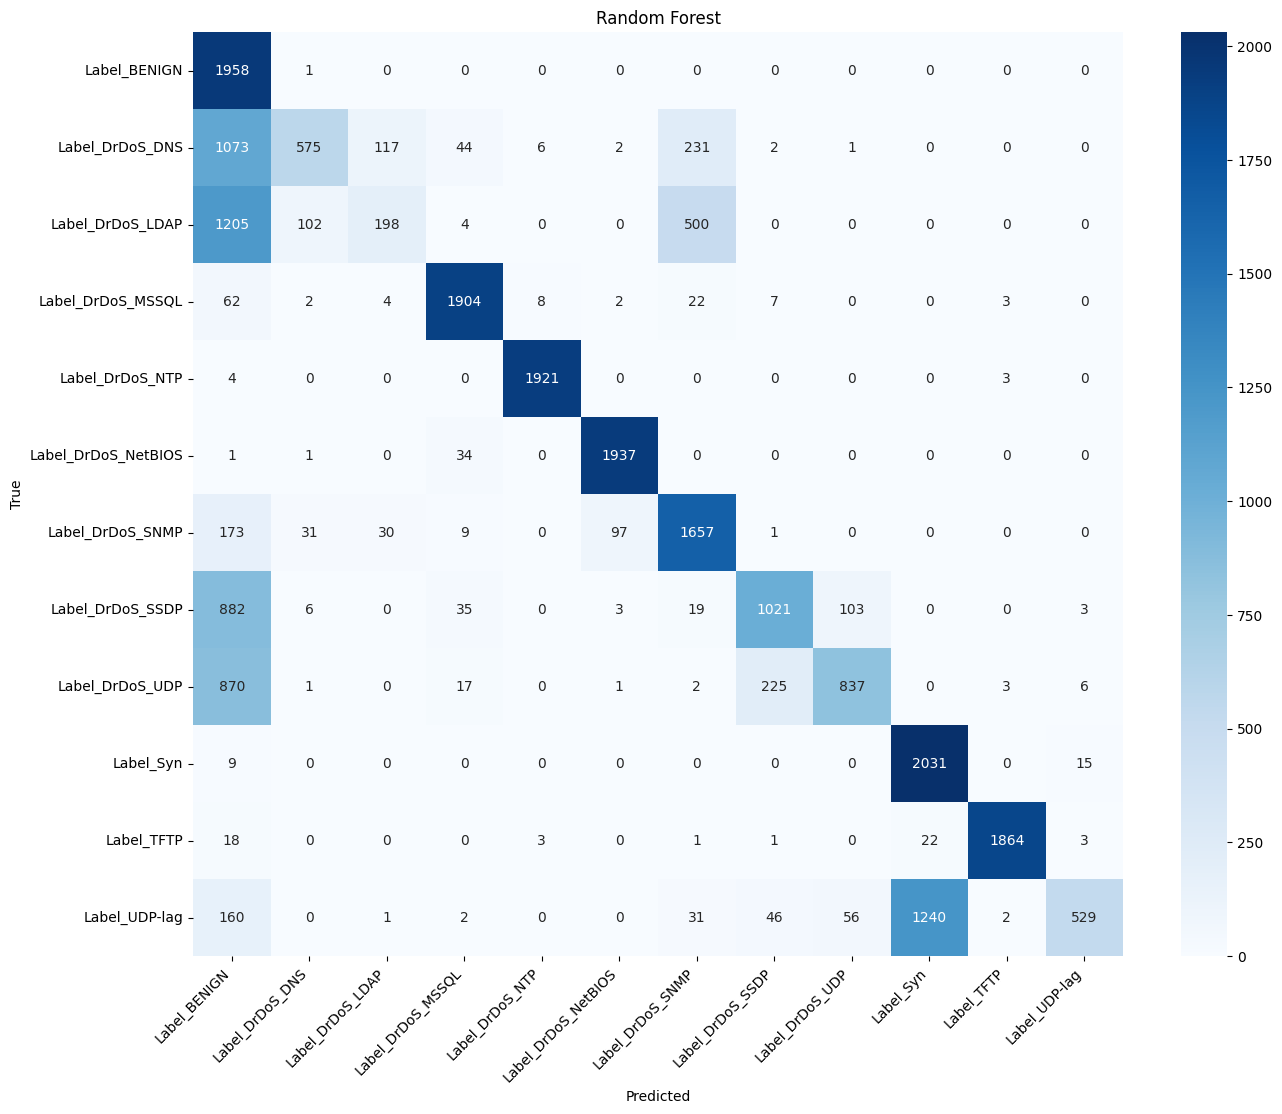

-------------------- Artificial Neural Network --------------------
               precision    recall  f1-score   support

       BENIGN     0.9379    0.9949    0.9656      1959
    DrDoS_DNS     0.5935    0.1068    0.1810      2051
   DrDoS_LDAP     0.4887    0.5829    0.5317      2009
  DrDoS_MSSQL     0.7982    0.8580    0.8270      2014
    DrDoS_NTP     0.9772    0.9321    0.9541      1928
DrDoS_NetBIOS     0.9442    0.9782    0.9609      1973
   DrDoS_SNMP     0.6191    0.7688    0.6859      1998
   DrDoS_SSDP     0.4444    0.0058    0.0114      2072
    DrDoS_UDP     0.4729    0.6086    0.5322      1962
          Syn     0.5919    0.9937    0.7419      2055
         TFTP     0.9877    0.9263    0.9560      1912
      UDP-lag     0.9893    0.1795    0.3038      2067

    micro avg     0.7297    0.6550    0.6904     24000
    macro avg     0.7371    0.6613    0.6376     24000
 weighted avg     0.7344    0.6550    0.6313     24000
  samples avg     0.6513    0.6550    0.6525     2

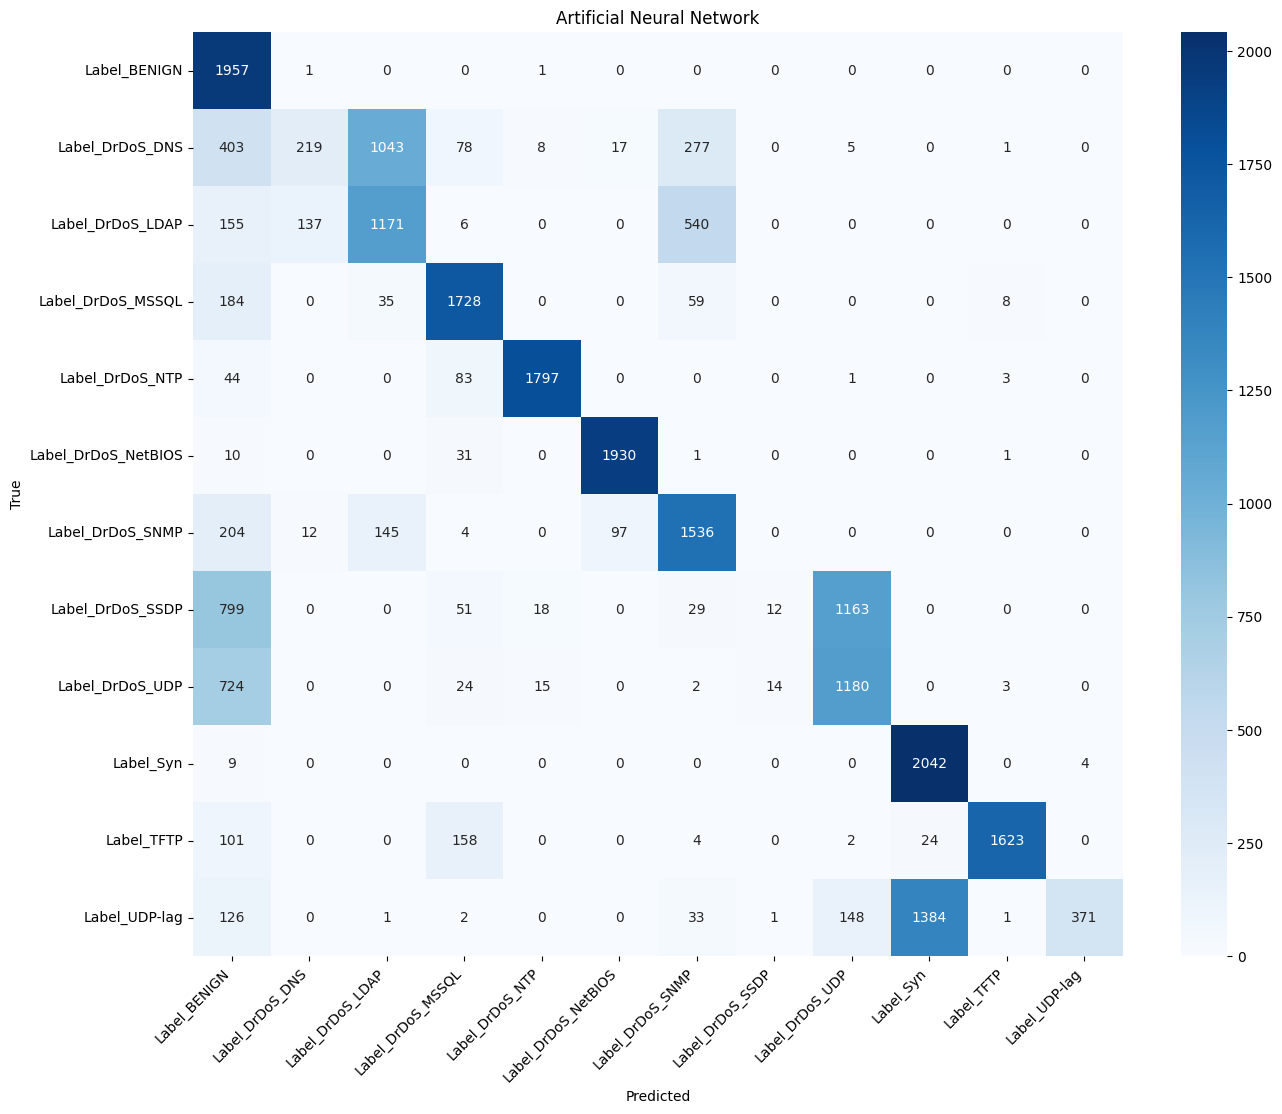

-------------------- Deep Neural Network --------------------
               precision    recall  f1-score   support

       BENIGN     0.9517    0.9949    0.9728      1959
    DrDoS_DNS     0.4633    0.6455    0.5394      2051
   DrDoS_LDAP     0.0000    0.0000    0.0000      2009
  DrDoS_MSSQL     0.8638    0.9067    0.8847      2014
    DrDoS_NTP     0.9929    0.9424    0.9670      1928
DrDoS_NetBIOS     0.9410    0.9787    0.9595      1973
   DrDoS_SNMP     0.6216    0.8338    0.7123      1998
   DrDoS_SSDP     0.5000    0.0101    0.0199      2072
    DrDoS_UDP     0.4739    0.4959    0.4847      1962
          Syn     0.5915    0.9976    0.7426      2055
         TFTP     0.9857    0.9357    0.9600      1912
      UDP-lag     0.9973    0.1790    0.3035      2067

    micro avg     0.7368    0.6548    0.6934     24000
    macro avg     0.6986    0.6600    0.6289     24000
 weighted avg     0.6956    0.6548    0.6231     24000
  samples avg     0.6538    0.6548    0.6541     24000



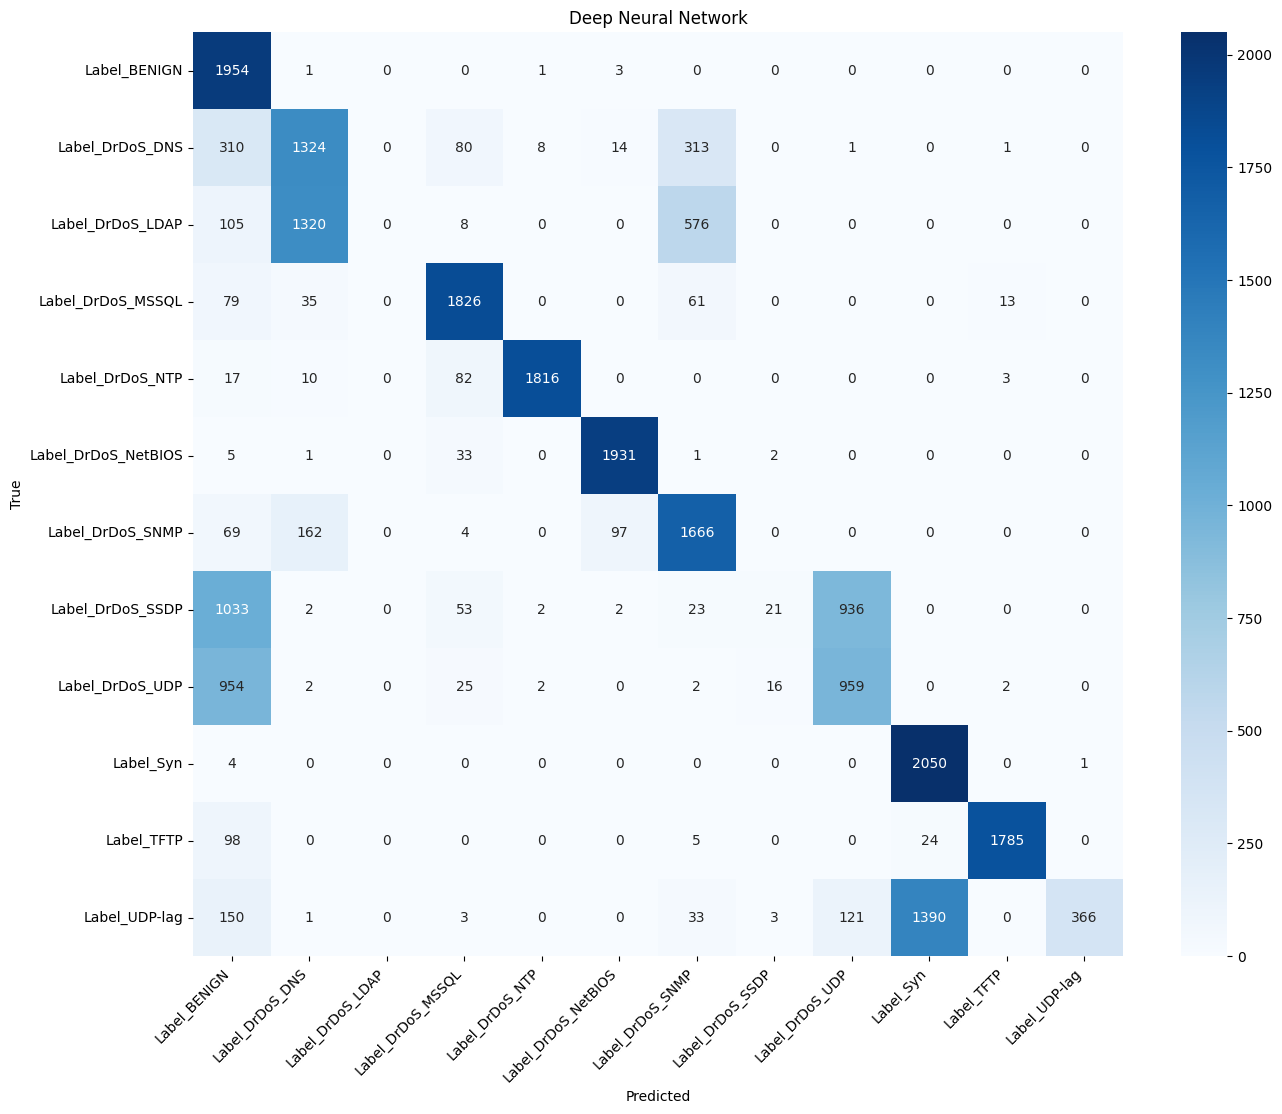

-------------------- XGBoost --------------------
               precision    recall  f1-score   support

       BENIGN     0.9954    0.9985    0.9969      1959
    DrDoS_DNS     0.8019    0.2843    0.4197      2051
   DrDoS_LDAP     0.5718    0.1010    0.1717      2009
  DrDoS_MSSQL     0.9309    0.9429    0.9369      2014
    DrDoS_NTP     0.9912    0.9959    0.9935      1928
DrDoS_NetBIOS     0.9476    0.9812    0.9641      1973
   DrDoS_SNMP     0.6730    0.8283    0.7427      1998
   DrDoS_SSDP     0.7375    0.4556    0.5632      2072
    DrDoS_UDP     0.7744    0.4077    0.5342      1962
          Syn     0.6196    0.9766    0.7582      2055
         TFTP     0.9926    0.9759    0.9842      1912
      UDP-lag     0.9314    0.2695    0.4180      2067

    micro avg     0.8348    0.6803    0.7497     24000
    macro avg     0.8306    0.6848    0.7070     24000
 weighted avg     0.8287    0.6803    0.7028     24000
  samples avg     0.6785    0.6803    0.6791     24000

Accuracy: 0.

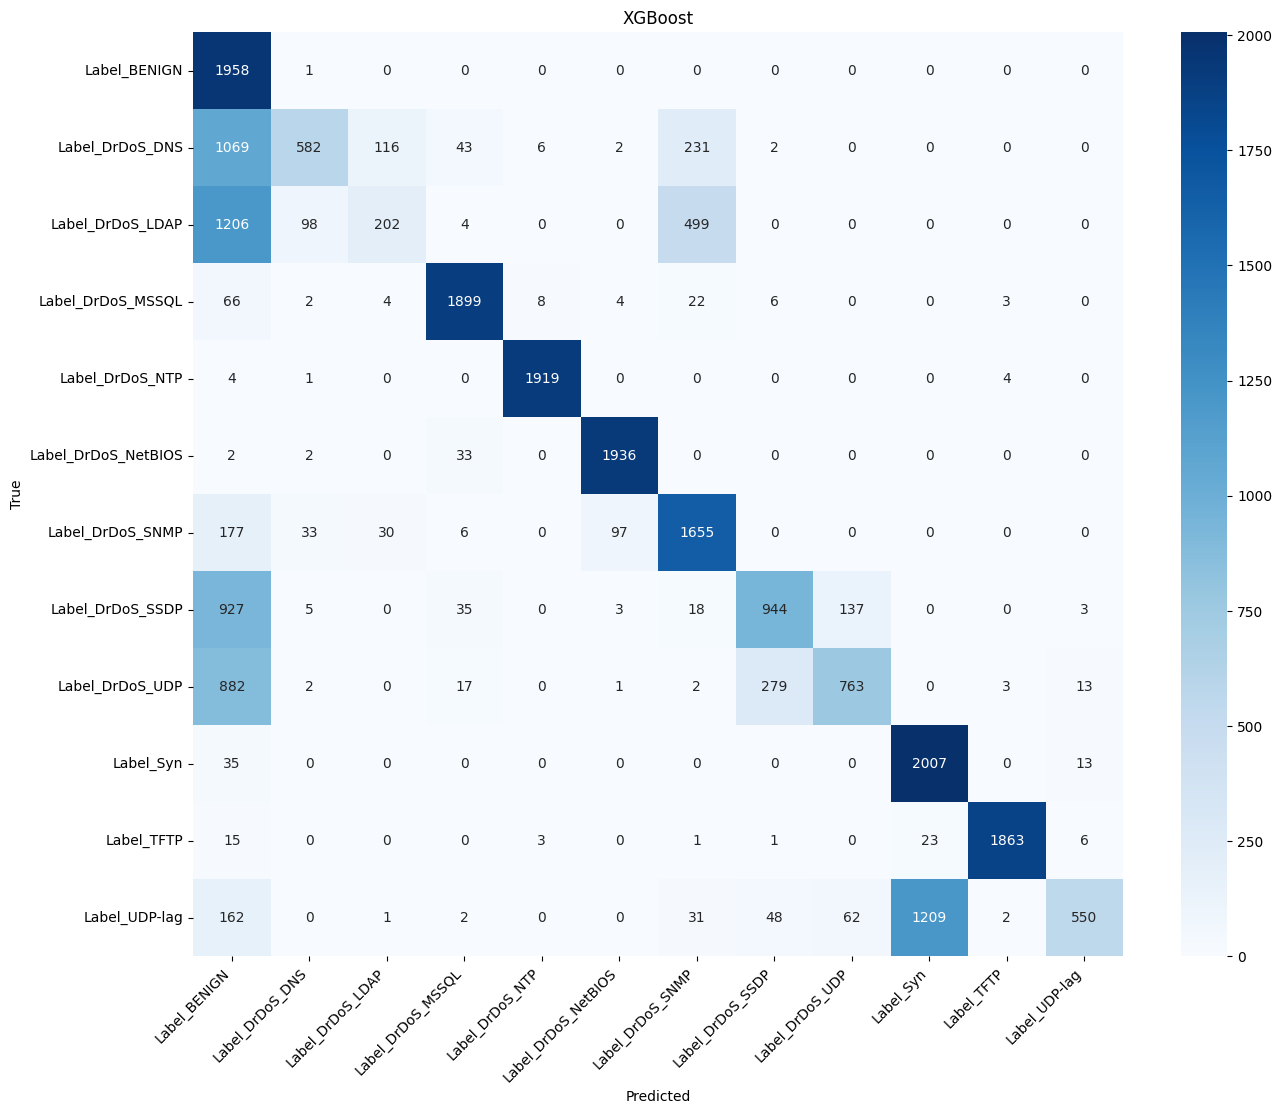

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

classification_reports = {}
accuracy_scores = {}
f1_scores = {}

# Iterate over the models
for i, (model_name, model) in enumerate(models.items()):
    # Fit the model on the training data
    model.fit(DDoS2019_train_X_scaled, DDoS2019_train_y)

    # Generate predictions for the test set
    y_pred = model.predict(DDoS2019_test_X_scaled)

    # Extract the target labels with "Label_" prefix
    target_columns = [col for col in DDoS2019_test_y.columns if col.startswith("Label_")]
    target_names = [col.split("Label_")[1] for col in target_columns]

    # Compute the classification report
    report = classification_report(DDoS2019_test_y[target_columns], y_pred, digits=4, target_names=target_names, output_dict=True)

    # Save the classification report
    classification_reports[model_name] = report

    # Print the classification report
    print(f"{'-' * 20} {model_name} {'-' * 20}")
    print(classification_report(DDoS2019_test_y[target_columns], y_pred, digits=4, target_names=target_names))

    # Compute the accuracy
    accuracy = accuracy_score(DDoS2019_test_y[target_columns], y_pred)
    accuracy_scores[model_name] = accuracy
    print(f"Accuracy: {accuracy}")
    print()

    # Compute the F1 score
    f1 = f1_score(DDoS2019_test_y[target_columns], y_pred, average='weighted')
    f1_scores[model_name] = f1

    # Compute the confusion matrix
    cm = confusion_matrix(DDoS2019_test_y[target_columns].values.argmax(axis=1), y_pred.argmax(axis=1))

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 9))

    # Create the heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

    # Set labels, title, and ticks
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'{model_name}')
    ax.xaxis.set_ticklabels(target_columns, rotation=45, ha='right')
    ax.yaxis.set_ticklabels(target_columns, rotation=0)

    # Show the plot
    plt.show()


To save the accuracy and F1 score of multiclass classification for further comparison

In [ ]:

directory = 'Dataset/Metrics'
pickle_file_path = f"{directory}/metrics_multiclass.pkl"

os.makedirs(directory, exist_ok=True)

with open(pickle_file_path, 'wb') as f:
    pickle.dump({'accuracy': accuracy_scores, 'f1_score': f1_scores}, f)